In [18]:
import numpy as np
import pandas as pd
import graspologic as gs
import seaborn as sns
import matplotlib.pyplot as plt

from graspologic.embed import AdjacencySpectralEmbed as ASE
from graspologic.simulations import sbm
from graspologic.utils import remove_vertices, augment_diagonal
from graspologic.plot import pairplot, heatmap

In [19]:
P = np.array([[.8, .2], 
              [.2, .8]])
M = sbm([50, 50], P)
A, a = remove_vertices(M, indices=[0, -1], return_removed=True)

ase = ASE(n_components=2)
ase.fit(A)

fitted_latents = ase.latent_left_
predicted_latents = ase.predict(A)

In [20]:
ase._pinv_left

array([[ 0.01427746,  0.0235149 ],
       [ 0.01250587,  0.01617801],
       [ 0.014191  ,  0.01865917],
       [ 0.01333854,  0.01773226],
       [ 0.01525935,  0.0214505 ],
       [ 0.01366671,  0.02082442],
       [ 0.011422  ,  0.01721948],
       [ 0.01380026,  0.01710564],
       [ 0.01340281,  0.01909489],
       [ 0.01522994,  0.02062433],
       [ 0.01530075,  0.01596945],
       [ 0.01363091,  0.01950277],
       [ 0.01436711,  0.01723484],
       [ 0.0145814 ,  0.02165641],
       [ 0.01515161,  0.01907866],
       [ 0.01406504,  0.01778556],
       [ 0.01531068,  0.01410655],
       [ 0.01486453,  0.01953687],
       [ 0.01481034,  0.01699258],
       [ 0.01724925,  0.01962242],
       [ 0.01520528,  0.0197773 ],
       [ 0.01316389,  0.01480329],
       [ 0.01588937,  0.02117608],
       [ 0.01527592,  0.01676571],
       [ 0.01412774,  0.01715521],
       [ 0.01388614,  0.02250209],
       [ 0.01498111,  0.01773297],
       [ 0.01410017,  0.01158171],
       [ 0.0125515 ,

### they're close but they're not on top of each other

In [21]:
np.allclose(fitted_latents, predicted_latents)

False

In [22]:
np.allclose(fitted_latents, predicted_latents, atol=1e-1)

True

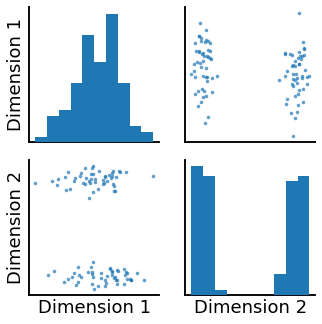

In [23]:
pairplot(fitted_latents)

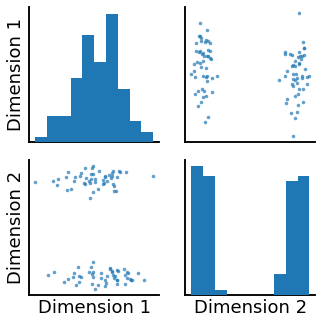

In [24]:
pairplot(predicted_latents)

In [25]:
fitted_latents_df = pd.DataFrame(fitted_latents, columns=["fit_x1", "fit_x2"])
predicted_latents_df = pd.DataFrame(predicted_latents, columns=["pred_x1", "pred_x2"])
pd.concat([fitted_latents_df, predicted_latents_df], axis='columns')

,fit_x1,fit_x2,pred_x1,pred_x2
0,0.685573,0.714361,0.678655,0.702967
1,0.600505,0.491473,0.595219,0.484635
2,0.681421,0.566848,0.674691,0.557999
3,0.640488,0.538690,0.634438,0.530646
4,0.732721,0.651646,0.724855,0.640589
...,...,...,...,...
93,0.775586,-0.588161,0.766927,-0.577782
94,0.696642,-0.648390,0.689613,-0.638048
95,0.731215,-0.533911,0.723523,-0.525033
96,0.725993,-0.457836,0.718355,-0.450222


### anton experiment

1. diag aug the matrix before doing anything else (before fit, etc)
2. do not diag_aug the matrix ever

### 1

In [26]:
# set up stuff
ase = ASE(n_components=2, diag_aug=True)
P = np.array([[.8, .2], 
              [.2, .8]])
M = sbm([50, 50], P)
A, a = remove_vertices(M, indices=[0, -1], return_removed=True)
A = augment_diagonal(A)

# fit and predict
ase.fit(A)
fitted_latents = ase.latent_left_
predicted_latents = ase.predict(A)

In [27]:
# eyyyyyyyyyyyyyyyyyyyyyyyyyyyy
np.allclose(fitted_latents, predicted_latents)

True

### 2

In [10]:
# set up stuff
ase = ASE(n_components=2, diag_aug=False)
P = np.array([[.8, .2], 
              [.2, .8]])
M = sbm([50, 50], P)
A, a = remove_vertices(M, indices=[0, -1], return_removed=True)

# fit and predict
ase.fit(A)
fitted_latents = ase.latent_left_
predicted_latents = ase.predict(A)

In [11]:
# eyyyyyyyyyyyyyyyyyyyyyyyyyyyy
np.allclose(fitted_latents, predicted_latents)

True